<img src="triangle_force_diagram.png" alt="Triangular Cam" width="600"/>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Eq, init_printing
from IPython.display import display

def draw_triangle(r1, theta1, r2, theta2):
    """
    Draws a triangle with one vertex at the origin, with the first side defined
    by the polar coordinates (r1, theta1) and the second side defined by (r2, theta2).
    The triangle is drawn with a red border and a white-filled interior.

    Parameters:
    r1 (float): Radius of the first side in polar coordinates.
    theta1 (float): Angle of the first side in polar coordinates (in radians).
    r2 (float): Radius of the second side in polar coordinates.
    theta2 (float): Angle of the second side in polar coordinates (in radians).
    """
    
    # Convert polar coordinates to Cartesian coordinates
    x1, y1 = r1 * np.cos(theta1), r1 * np.sin(theta1)
    x2, y2 = r2 * np.cos(theta2), r2 * np.sin(theta2)

    # Define the vertices of the triangle
    vertices = np.array([[0, 0], [x1, y1], [x2, y2]])

    # Create the triangle with red border and white fill
    plt.figure()
    plt.fill(vertices[:, 0], vertices[:, 1], edgecolor='grey', facecolor='grey')

    # Set equal scaling
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.title("Triangle with One Vertex at the Origin")
    plt.show()

# Example usage
# draw_triangle(3, np.pi / 4, 2, np.pi / 3)

In [93]:
# Setup for a triangle 
# Assume left end is a pivot point.
# F_L is force on left end. F_R is force on right end.

import sympy as sp
import numpy as np
from IPython.display import display


# Define the variables
F_L_y, F_R_y, F_a = sp.symbols('F_L_y F_R_y F_a')
F_n = sp.symbols('F_n')
r1, r2, theta1, theta2, mu = sp.symbols('r1 r2 𝜃_1 𝜃_2 µ')

# Define the equations
eq1 = sp.Eq(F_L_y + F_R_y - F_a, 0)
eq2 = sp.Eq(r1 * F_R_y * sp.cos(theta1) + r1 * F_n * sp.sin(theta1) - r2 * F_a * sp.cos(theta2), 0)
eq3 = sp.Eq(F_R_y, mu * F_n)  # in order to be able to solve, need an additional contraint. Use friction force.

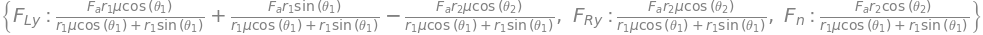

In [92]:
# Solve the system of equations
solution = sp.solve([eq1, eq2, eq3], (F_L_y, F_R_y, F_n))

display(eq1, eq2, eq3)
solution

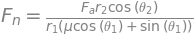

In [23]:
F_n_solution = sp.simplify(solution[F_n])
F_n_eq = sp.Eq(F_n, F_n_solution)
F_n_eq

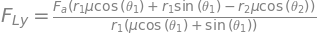

In [24]:
F_L_y_solution = sp.simplify(solution[F_L_y])
F_L_y_eq = sp.Eq(F_L_y, F_L_y_solution)
F_L_y_eq

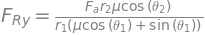

In [25]:
F_R_y_solution = sp.simplify(solution[F_R_y])
F_R_y_eq = sp.Eq(F_R_y, F_R_y_solution)
F_R_y_eq


In [26]:
sp.simplify(F_R_y_solution + F_L_y_solution) # check force balance in vertical direction.

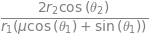

In [43]:
# force multiplier
F_mult = 2 * F_n_solution / F_a
F_mult

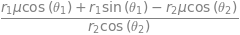

In [44]:
# apparent coeff. of friction on left side:
mu_l = sp.simplify(F_L_y_solution / F_n_solution)
mu_l

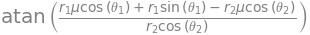

In [45]:
F_L_angle = sp.atan(mu_l)
F_L_angle

### Test particular values for $\theta_1, \theta_2, r_1, r_2, \mu$

In [60]:
th1_val = np.radians(10) # 10 degrees
th2_val = np.radians(60) # 60 degrees 
sub_dict = {theta1: th1_val, theta2: th2_val, mu: 0.4, F_a:12, r1:4, r2:6}

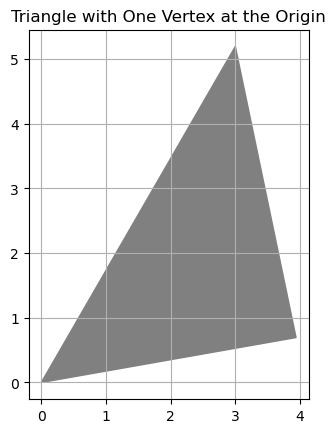

In [61]:
draw_triangle(sub_dict[r1], sub_dict[theta1], sub_dict[r2], sub_dict[theta2])

In [91]:
from IPython.display import display, Math
F_L_y_val = float(solution[F_L_y].subs(sub_dict).evalf())
F_R_y_val = float(solution[F_R_y].subs(sub_dict).evalf())
F_n_val =  float(solution[F_n].subs(sub_dict).evalf())
F_mult_val = float(F_mult.subs(sub_dict).evalf())

latex_str = fr"""
F_{{Ly}} = {F_L_y_val:.2f}, \quad 
F_{{Ry}} = {F_R_y_val:.2f}, \quad 
F_n = {F_n_val:.2f}, \quad
F_{{\text{{mult}}}} = {F_mult_val:.2f}
"""
display(Math(latex_str))

<IPython.core.display.Math object>

In [68]:
np.rad2deg(float(F_L_angle.subs(sub_dict).evalf()))

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def plot_sympy_expression(expr, x_var, y_var, x_range, y_range, sub_dict):
    """
    Plots a SymPy expression with specified values for some variables, while 
    using the remaining variables to represent the x and y axes.

    Parameters:
    -----------
    expr : sympy.Expr
        The SymPy expression to plot.
    x_var : sympy.Symbol
        The variable to be used for the x-axis.
    y_var : sympy.Symbol
        The variable to be used for the y-axis.
    x_range : tuple
        A tuple specifying the range of values for the x-axis in the form (x_min, x_max).
    y_range : tuple
        A tuple specifying the range of values for the y-axis in the form (y_min, y_max).
    sub_dict : dict
        A dictionary where the keys are SymPy Symbols and the values are the numerical values 
        to be substituted for those variables in the expression.

    Returns:
    --------
    None
    """

    # Substitute the given variable values into the expression
    expr_substituted = expr.subs(sub_dict)

    # Convert the sympy expression to a lambda function for numerical evaluation
    f = sp.lambdify((x_var, y_var), expr_substituted, "numpy")

    # Create a grid of x and y values
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_vals = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate the function on the grid
    Z = f(X, Y)

    # Plotting the result
    plt.figure(figsize=(8, 6))
    # Set the font to a default that supports a wide range of characters
    plt.rcParams['font.family'] = 'DejaVu Sans'
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.xlabel(rf'${str(x_var)}$')
    plt.ylabel(rf'${str(y_var)}$')
    plt.title(rf'${sp.latex(expr)}$ | ${sub_dict}$')
    plt.show()

# Example usage
# x, y, z = sp.symbols('x y z')
# expr = sp.sin(x*y) + z

# plot_sympy_expression(expr, x, y, x_range=(0, 10), y_range=(0, 10), z=1)